<a href="https://colab.research.google.com/github/Pooja-m99/Machine_Learning_Algorithms/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
%matplotlib inline
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['Target'])
data=pd.concat([features,target],axis=1)

In [0]:
data2=data.corr('pearson')
abs(data2.loc['Target']).sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [0]:
X=data['LSTAT']
Y=data['Target']


In [0]:
X=np.array(X/X.mean())
Y=np.array(Y/Y.mean())

In [0]:
n=int(0.8*len(X))
x_train=X[:n]
y_train=Y[:n]
x_test=X[n:]
y_test=Y[n:]

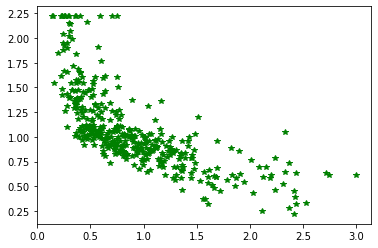

In [0]:
plt.plot(x_train,y_train,'g*')

In [0]:
def hypothesis(a,b,x):
    return a*x + b

In [0]:
def error(a,b,x,y):
    e=0
    m=len(y)
    for i in range(m):
      e+=np.power((hypothesis(a,b,x[i])-y[i]),2)

    return (1/(2*m))*e

In [0]:
  def step_gradient(a,b,x,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
      grad_a+=1/m*(hypothesis(a,b,x[i]-y[i])*x[i])
      grad_b+=1/m*(hypothesis(a,b,x[i]-y[i]))
      a=a-(grad_a* learning_rate)
      b=b-(grad_b*learning_rate)

      return a,b
      

In [0]:
def descend(initial_a, initial_b,x,y,learning_rate,iteration):
    a=initial_a
    b=initial_b
    for i in range(iterations):
       e=error(a,b,x,y)
       if i % 1000==0:
        print(f"Error: {e},a:{a},b:{b}")
        a,b= step_gradient(a,b,x,y,learning_rate)
    return a,b


In [0]:
a=0
b=1
learning_rate=0.1
iterations=10000
final_a,final_b=descend(a,b,x_train,y_train,learning_rate,iterations)


Error: 0.08691047391394598,a:0,b:1
Error: 0.08691969138039152,a:-9.742093624586316e-05,b:0.9997524752475248
Error: 0.0869290220822823,a:-0.00019482413181087533,b:0.9995049955701413
Error: 0.08693846595714919,a:-0.0002922095899256743,b:0.9992575609596411
Error: 0.08694802294254955,a:-0.0003895773138203096,b:0.9990101714078176
Error: 0.08695769297606738,a:-0.0004869273067242424,b:0.9987628269064652
Error: 0.08696747599531333,a:-0.0005842595718663459,b:0.9985155274473803
Error: 0.08697737193792454,a:-0.0006815741124749054,b:0.9982682730223603
Error: 0.08698738074156502,a:-0.000778870931777618,b:0.9980210636232045
Error: 0.08699750234392495,a:-0.0008761500330015933,b:0.9977738992417136


In [0]:
print(error(a,b,x_train,y_train))


0.08691047391394598


In [0]:
print(error(final_a,final_b,x_train,y_train))

0.08700773668272117


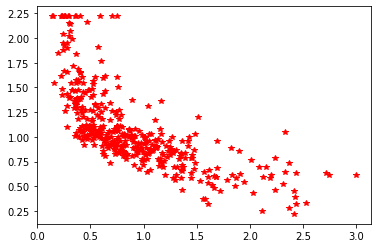

In [0]:
plt.plot(x_train,y_train,'r*')

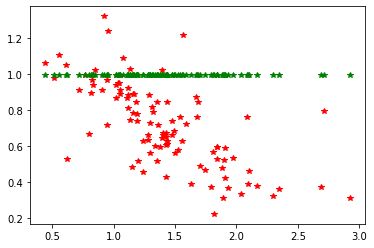

In [0]:
plt.plot(x_test,y_test,'r*',x_test,hypothesis(final_a,final_b,x_test),'g*')